In [11]:
# install missingno
pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [55]:
!pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data 

hos = pd.read_csv("diabetes.csv")


In [3]:
hos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [4]:
hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
hos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
hos.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# checking for null

hos.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

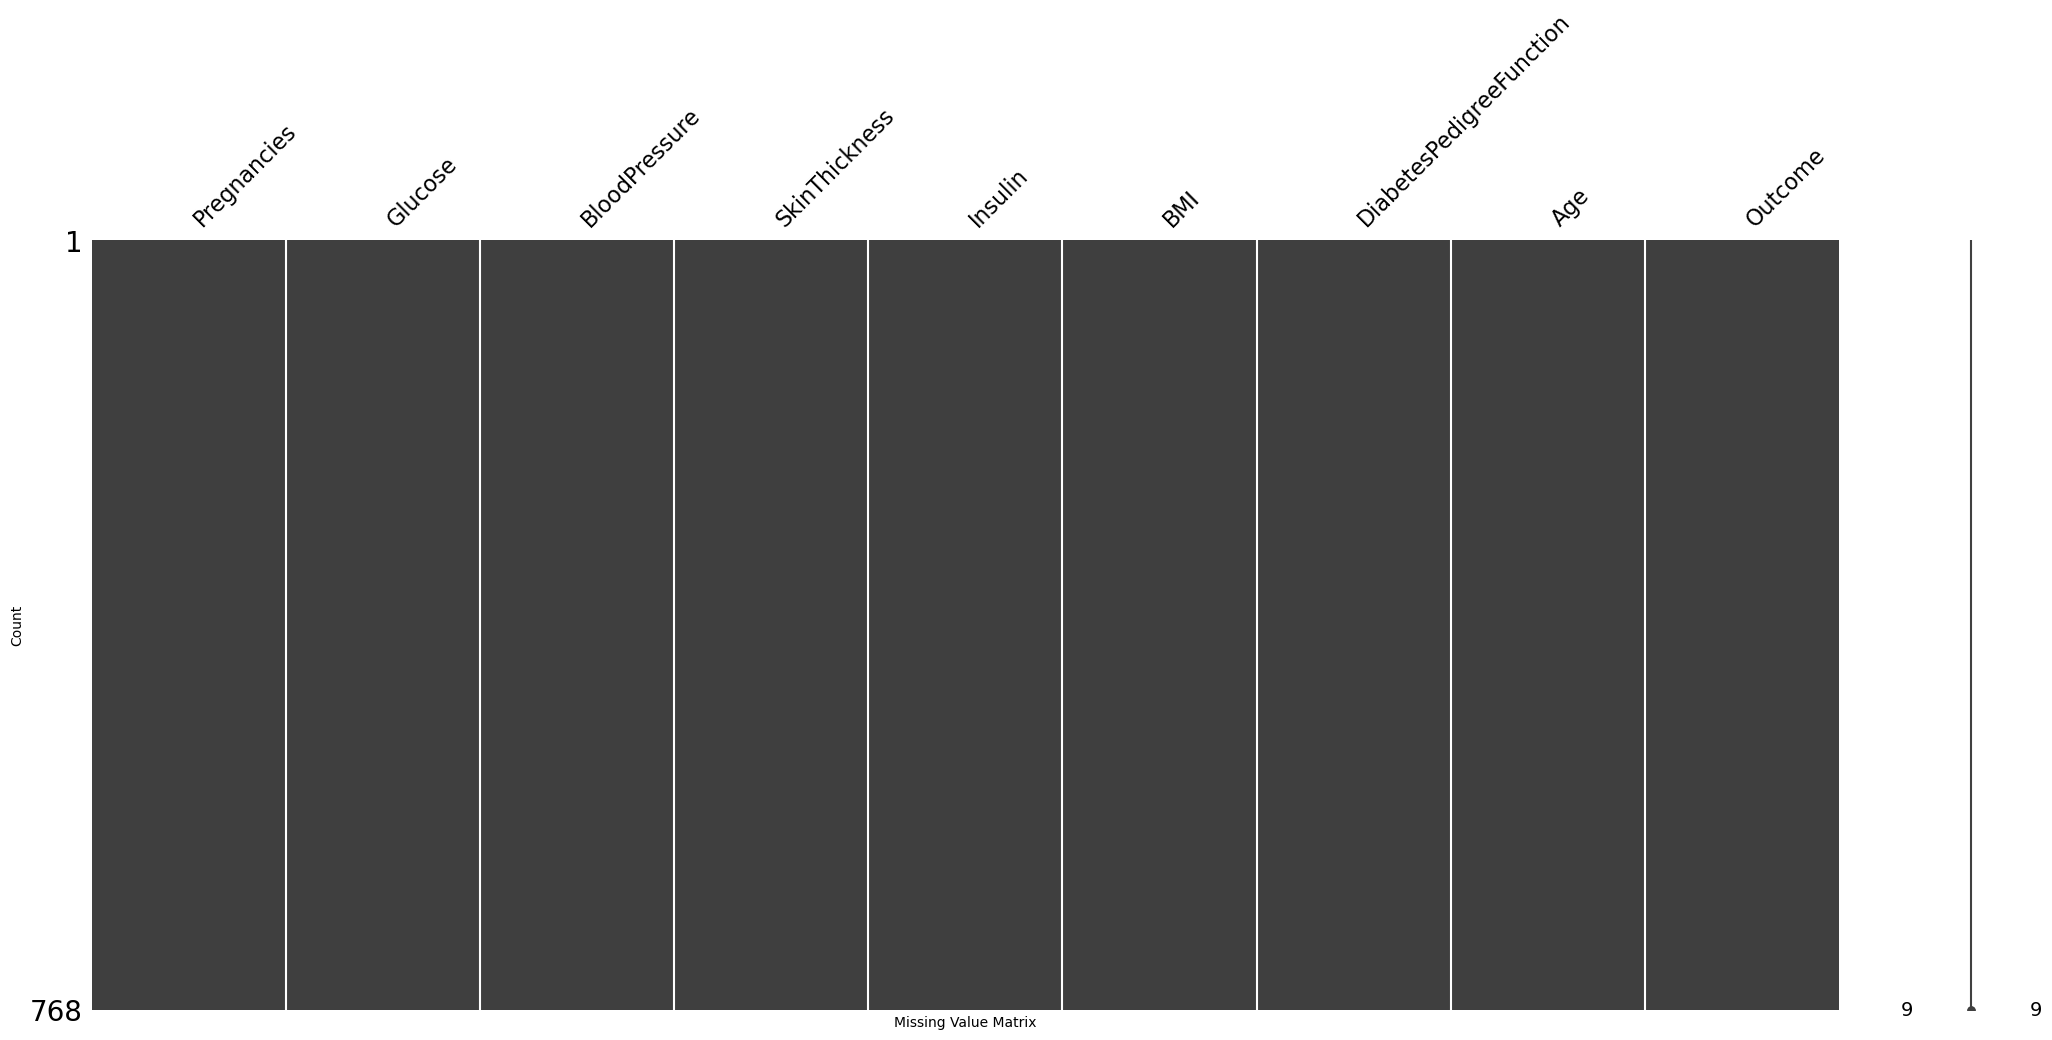

In [8]:
# visualizing Missing Data

import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(hos)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")
plt.show()


# EDA

# pregnancies

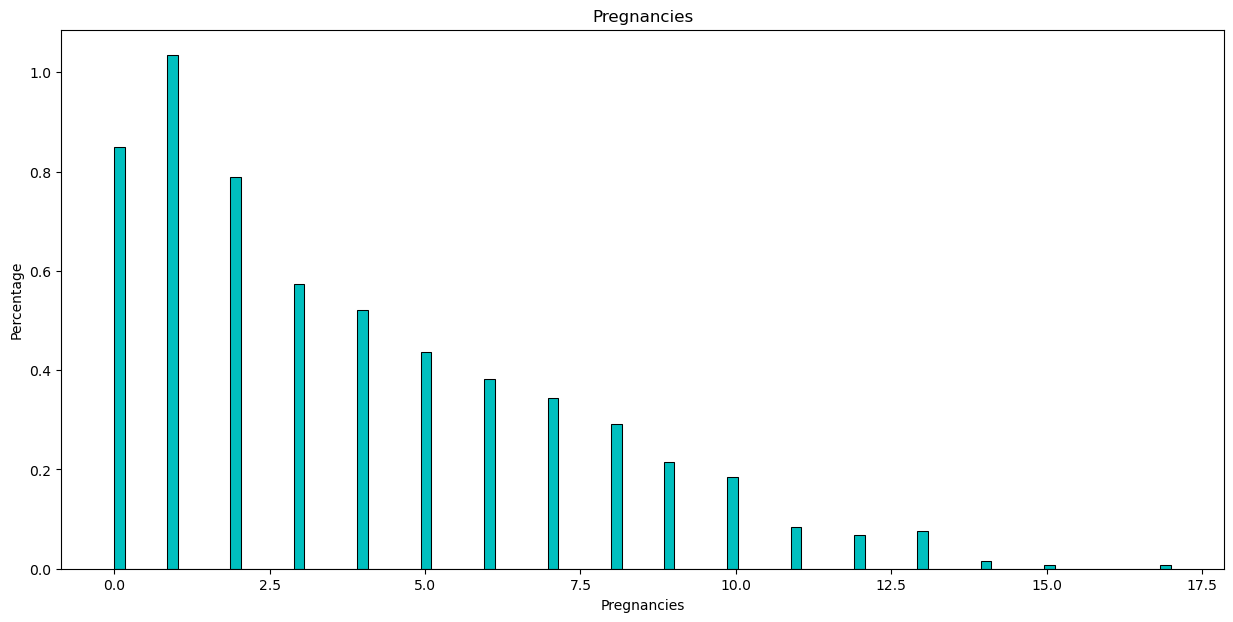

In [9]:
plt.figure(figsize=(15, 7))
sns.histplot(hos["Pregnancies"], facecolor='c', bins=100, stat="density")
plt.ylabel("Percentage")  # Corrected the typo here
plt.title("Pregnancies")
plt.show()


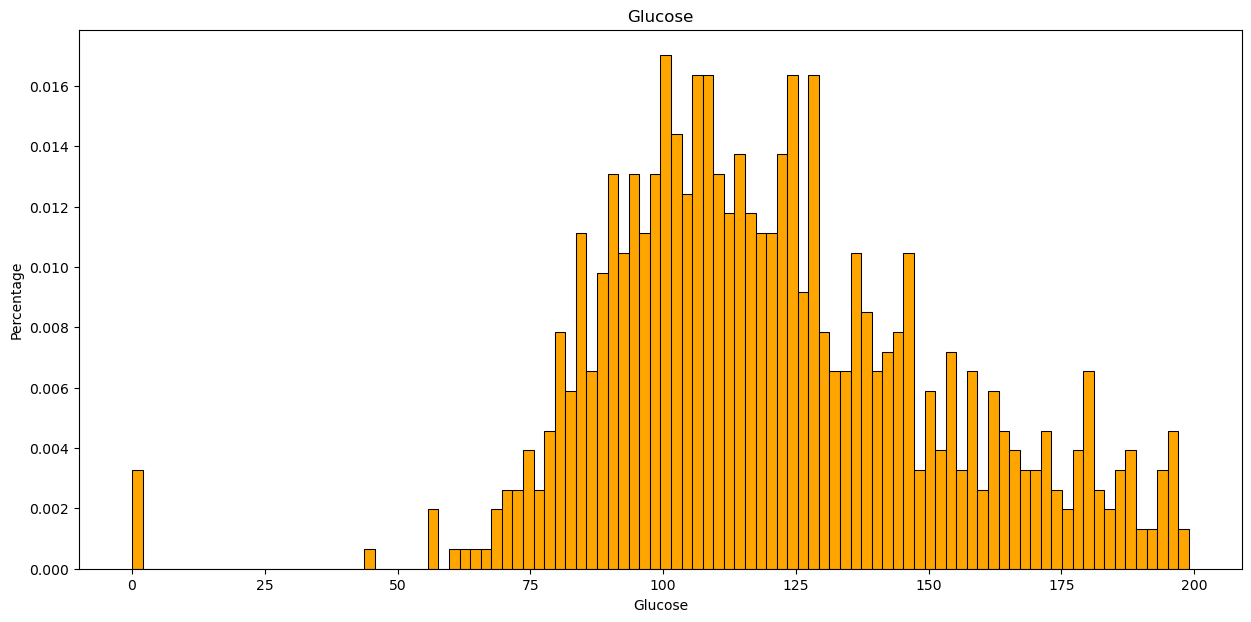

In [10]:
# Glucose
plt.figure(figsize=(15, 7))
sns.histplot(hos["Glucose"], facecolor='orange', bins=100, stat="density")
plt.ylabel("Percentage")  # Corrected the typo here
plt.title("Glucose")
plt.show()



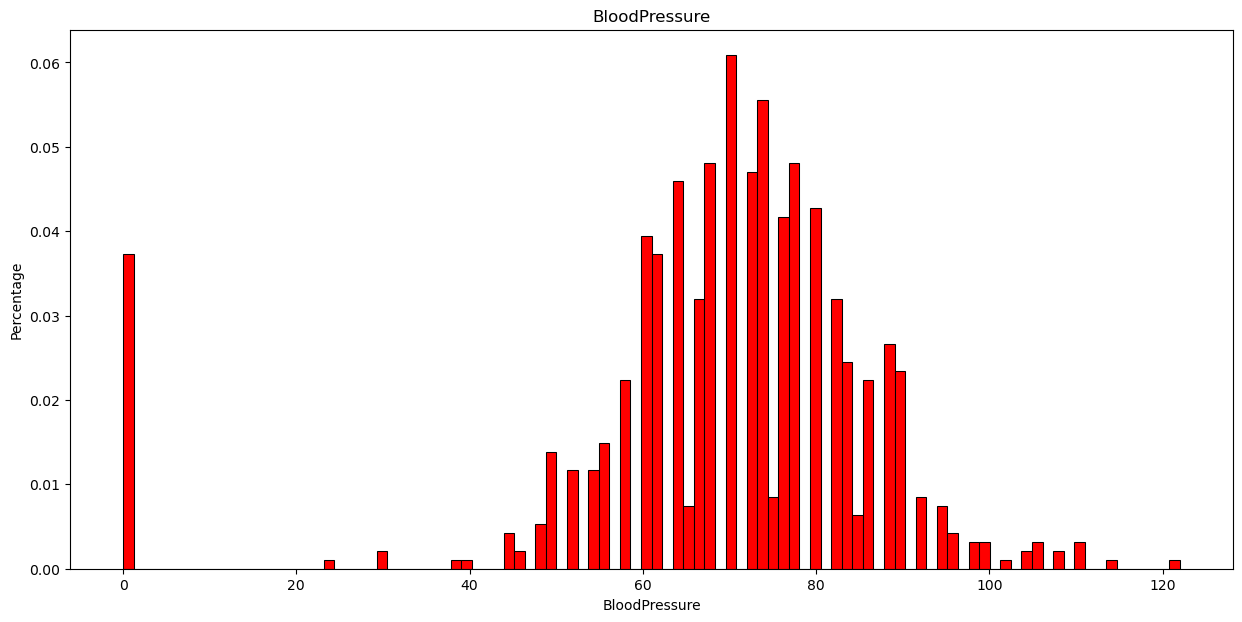

In [11]:
# BloodPresssure
plt.figure(figsize=(15, 7))
sns.histplot(hos["BloodPressure"], facecolor='Red', bins=100, stat="density")
plt.ylabel("Percentage")  # Corrected the typo here
plt.title("BloodPressure")
plt.show()




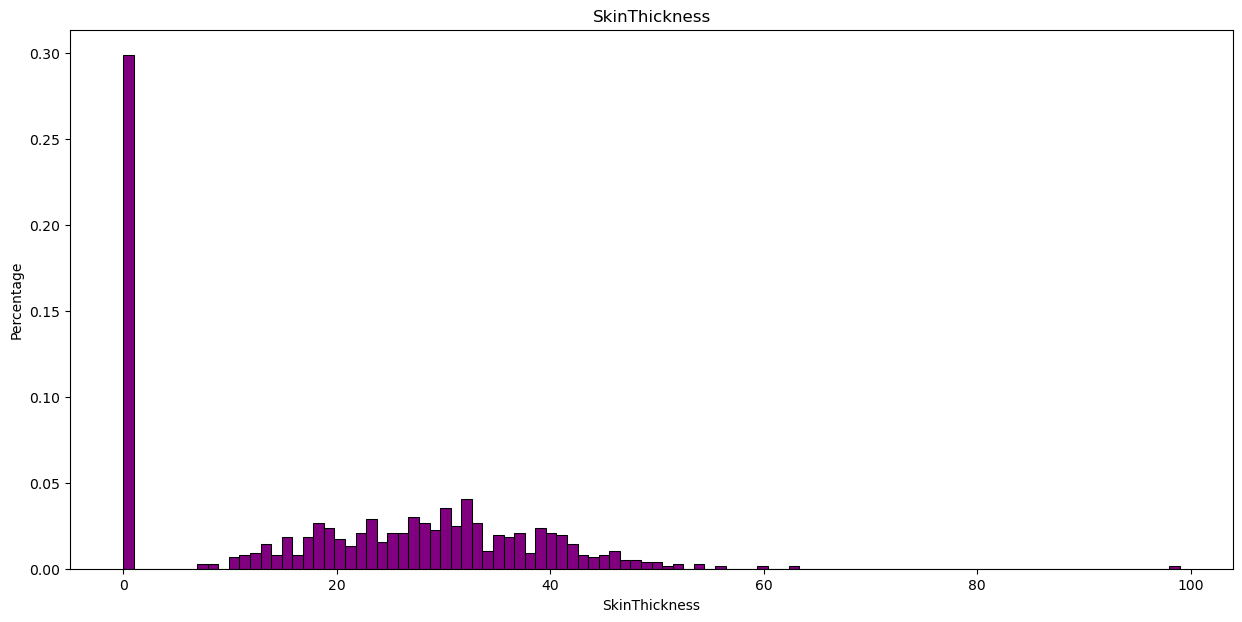

In [12]:
# SkinThickness

plt.figure(figsize=(15, 7))
sns.histplot(hos["SkinThickness"], facecolor='purple', bins=100, stat="density")
plt.ylabel("Percentage")  # Corrected the typo here
plt.title("SkinThickness")
plt.show()


array([<Axes: ylabel='count'>], dtype=object)

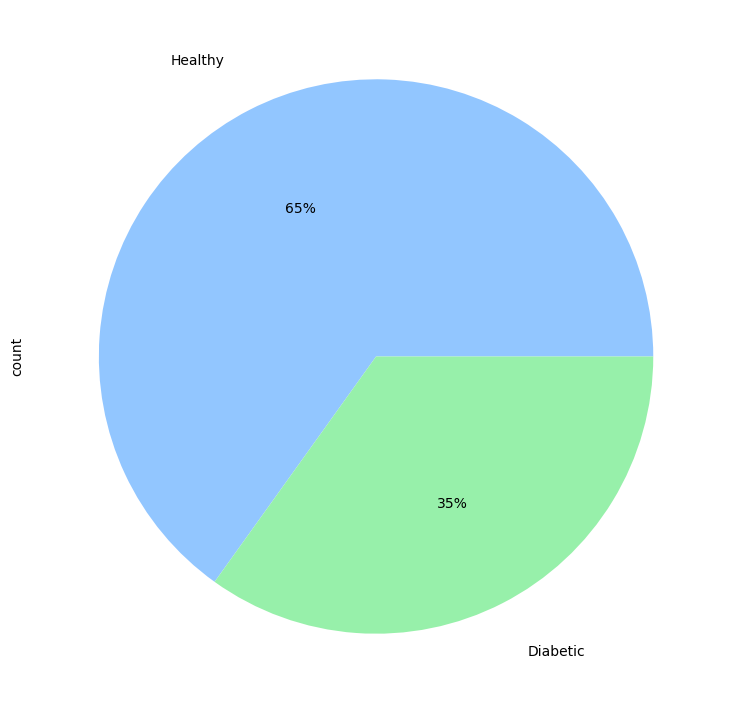

In [13]:
 # Visualization of Traget Variable
    
import matplotlib.style as style
style.available
    
style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
hos['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))
    

Samples of diabetic people:  268
Samples of healthy people:  500


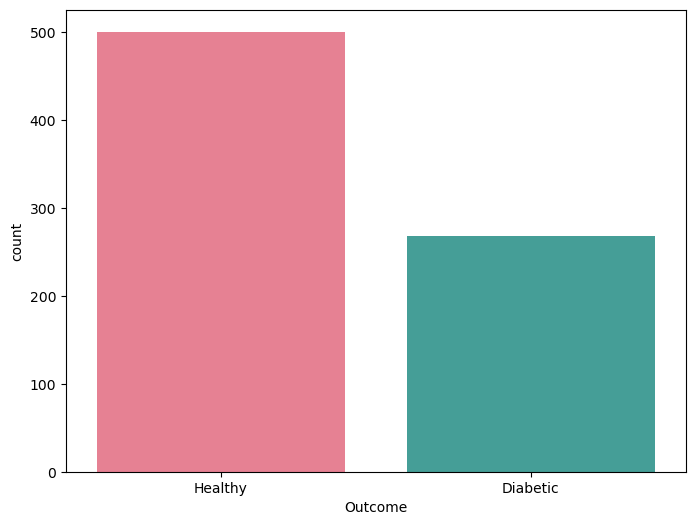

In [14]:
from matplotlib.pyplot import figure, show
import seaborn as sns

figure(figsize=(8, 6))
ax = sns.countplot(x=hos['Outcome'], data=hos, palette="husl")
ax.set_xticklabels(["Healthy", "Diabetic"])

# Corrected the method name to 'value_counts()'
healthy, diabetics = hos['Outcome'].value_counts().values

# Print the number of samples
print("Samples of diabetic people: ", diabetics)
print("Samples of healthy people: ", healthy)

# Display the plot
show()

# distribution of other feature W.r.t Outcome

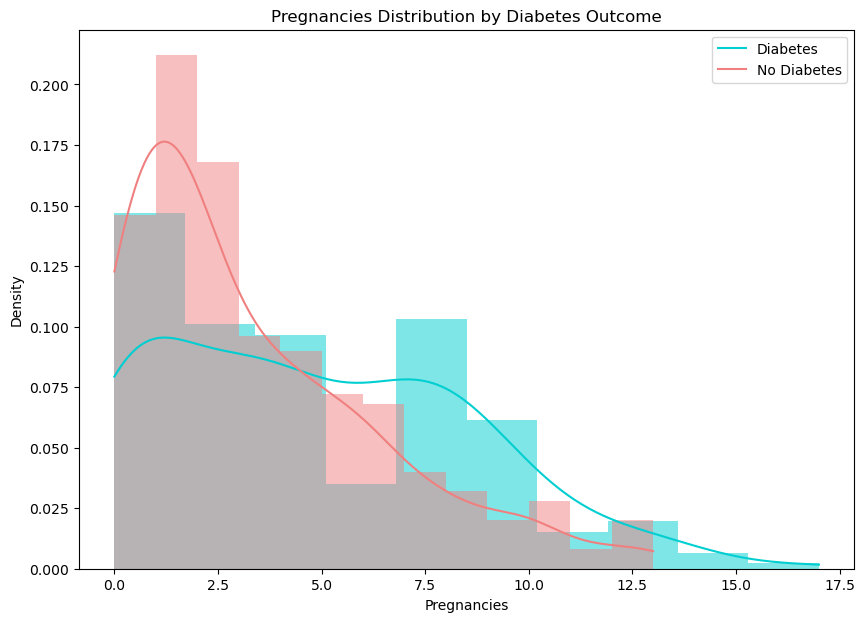

In [15]:
from matplotlib.pyplot import figure, show
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

# Corrected color name to 'darkturquoise'
sns.histplot(hos['Pregnancies'][hos.Outcome == 1], color="darkturquoise", kde=True, stat="density", linewidth=0)
sns.histplot(hos['Pregnancies'][hos.Outcome == 0], color="lightcoral", kde=True, stat="density", linewidth=0)

plt.legend(['Diabetes', 'No Diabetes'])
plt.title('Pregnancies Distribution by Diabetes Outcome')
plt.show()

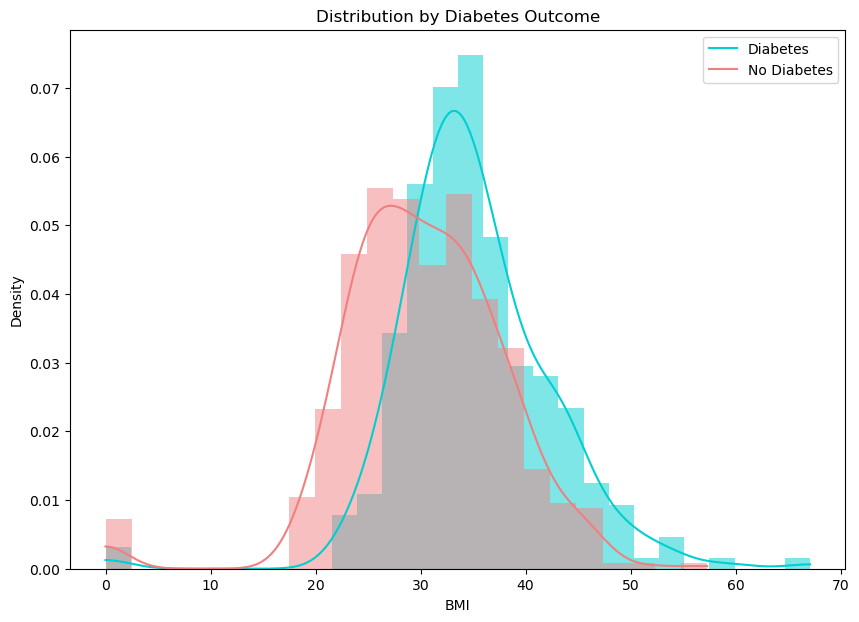

In [16]:
from matplotlib.pyplot import figure, show
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

# Corrected color name to 'darkturquoise'
sns.histplot(hos['BMI'][hos.Outcome == 1], color="darkturquoise", kde=True, stat="density", linewidth=0)
sns.histplot(hos['BMI'][hos.Outcome == 0], color="lightcoral", kde=True, stat="density", linewidth=0)

plt.legend(['Diabetes', 'No Diabetes'])
plt.title('Distribution by Diabetes Outcome')
plt.show()

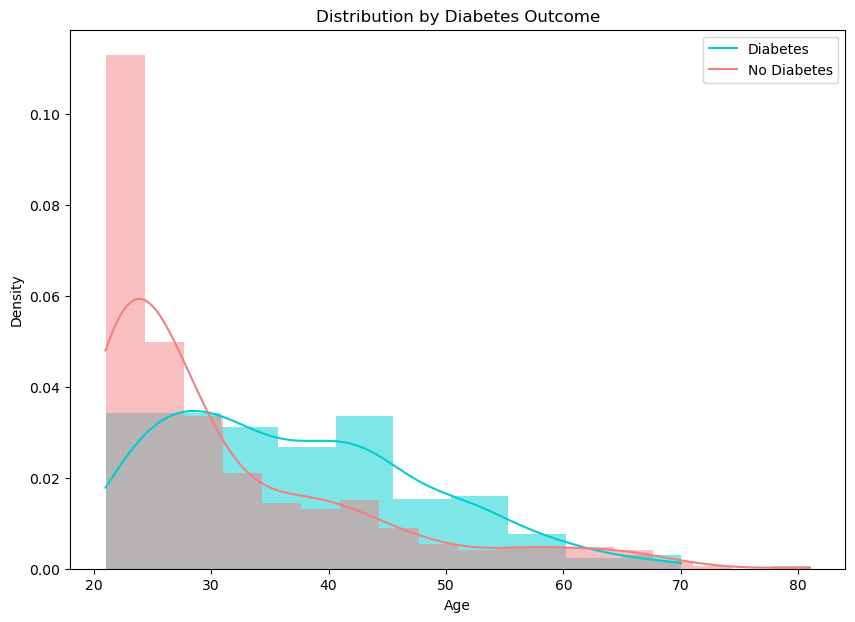

In [17]:
from matplotlib.pyplot import figure, show
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

# Corrected color name to 'darkturquoise'
sns.histplot(hos['Age'][hos.Outcome == 1], color="darkturquoise", kde=True, stat="density", linewidth=0)
sns.histplot(hos['Age'][hos.Outcome == 0], color="lightcoral", kde=True, stat="density", linewidth=0)

plt.legend(['Diabetes', 'No Diabetes'])
plt.title('Distribution by Diabetes Outcome')
plt.show()

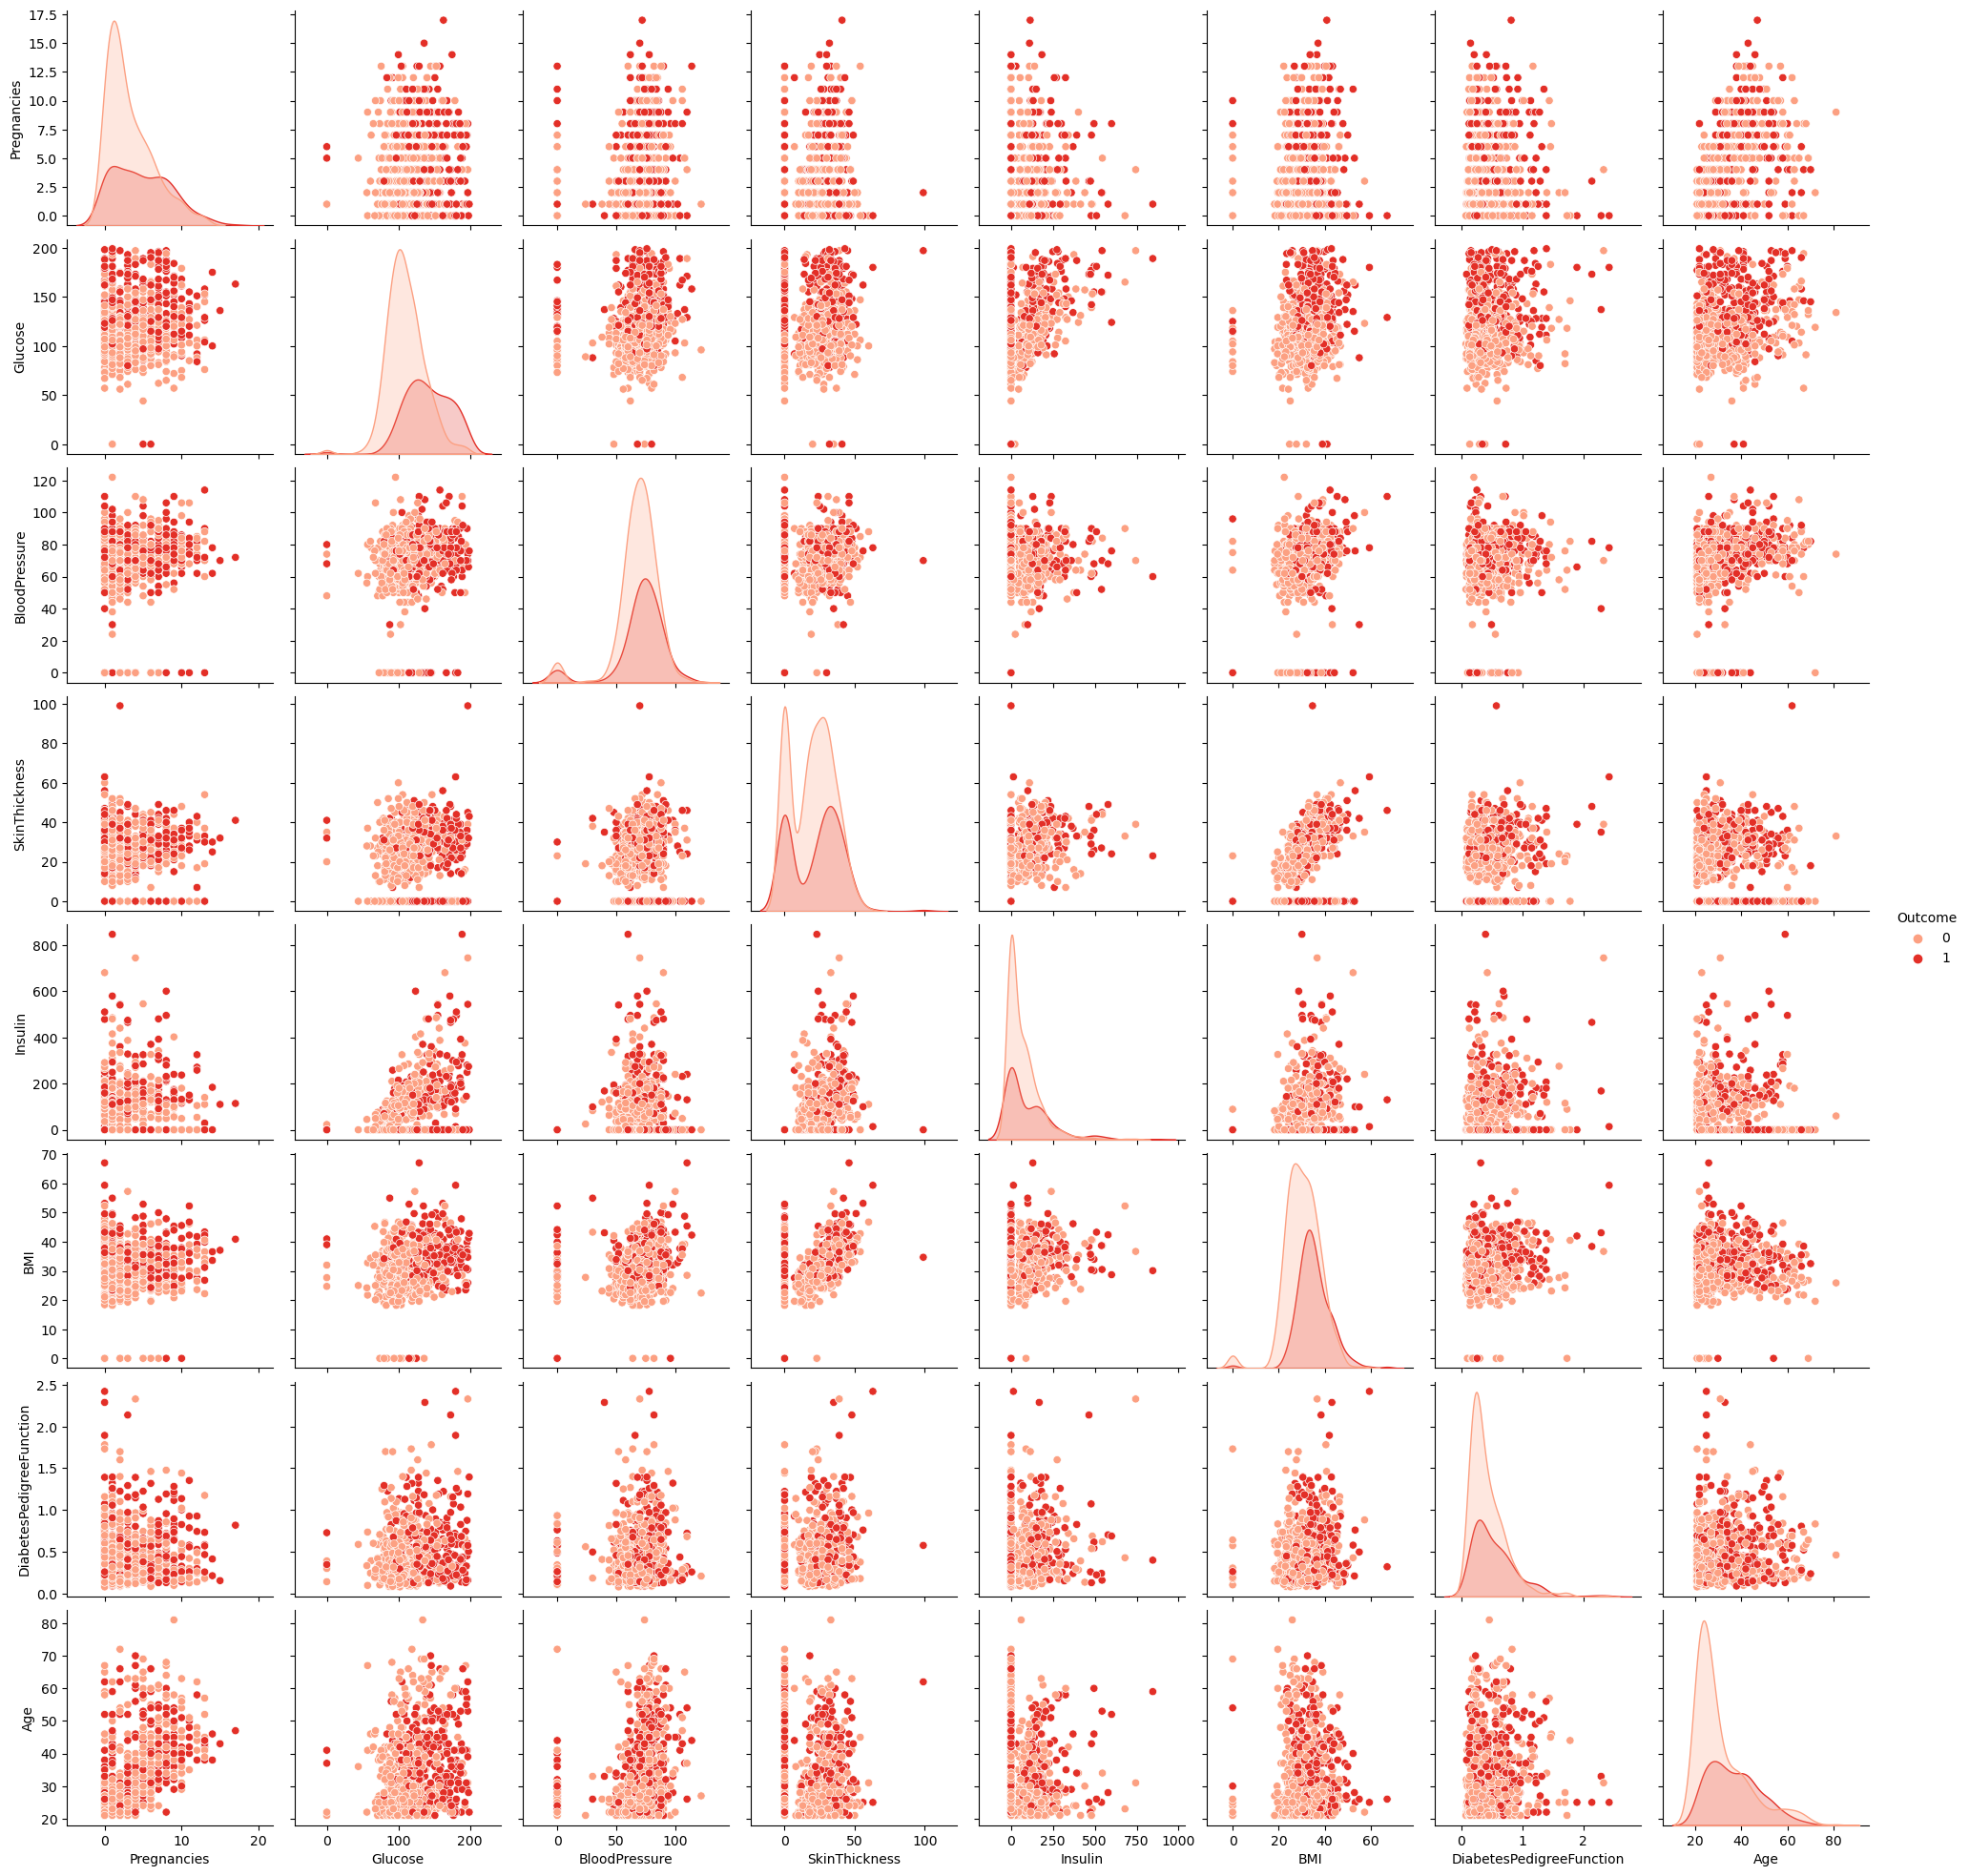

In [18]:
sns.pairplot(hos, hue="Outcome",palette="Reds")

# Finding Correlation between the columns

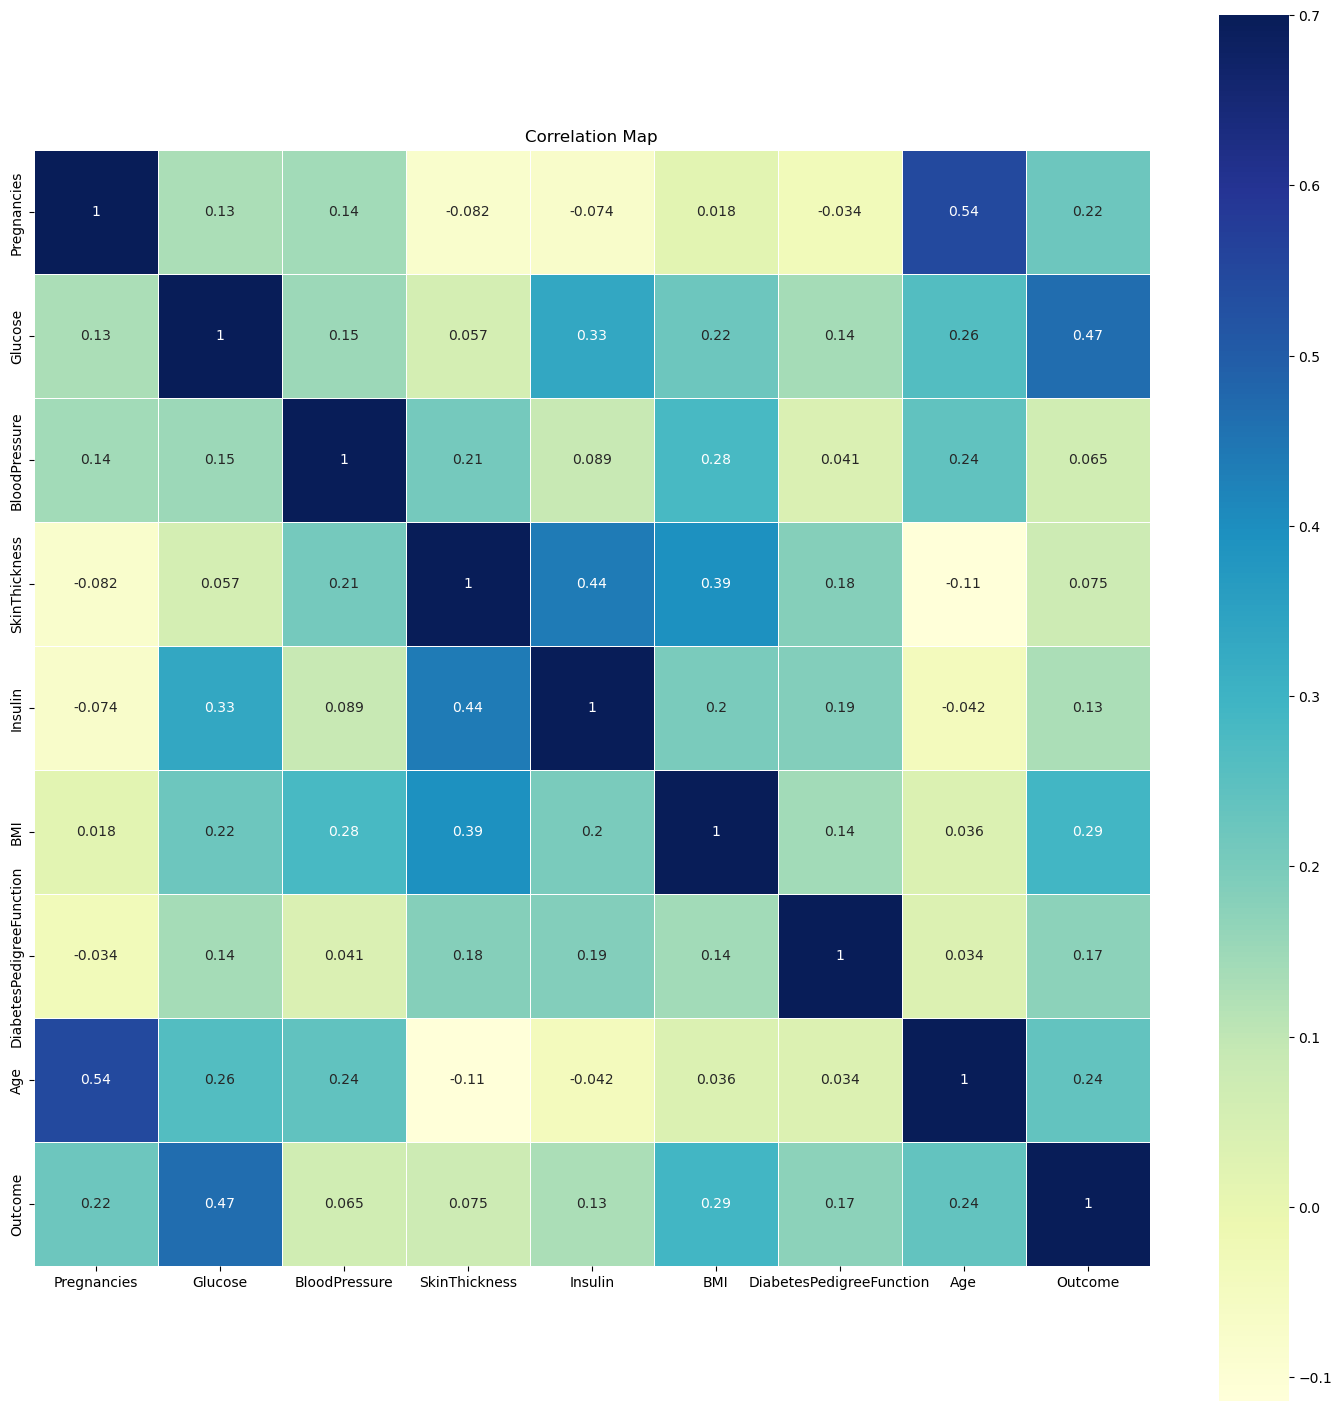

In [19]:
matrix = hos.corr()
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(matrix, vmax=.7, square=True, cmap="YlGnBu", annot=True, linewidths= .5)
ax.set_title('Correlation Map')  # Corrected this line
plt.show()


# splitting the data into trainig and testing data

In [20]:
from sklearn.model_selection import train_test_split
x = hos.iloc[:, :-1]
y = hos.iloc[:, -1 ]

In [21]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [24]:
y_train.head()

334    0
139    0
485    1
547    0
18     0
Name: Outcome, dtype: int64

# Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


# Support Vector Classifier



In [26]:
from sklearn.svm import SVC

svc_model = SVC(random_state=42)

svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

SVCscore = svc_model.score(x_test,y_test)
confusion_matrix(y_test, y_pred)

array([[131,  20],
       [ 41,  39]], dtype=int64)

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Define and train the model
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

# Make predictions
y_pred = SVC_model.predict(X_test)

# Print the result
print('Train/Test split result:\n')
print(SVC_model.__class__.__name__ + " basic accuracy is %2.3f" % accuracy_score(y_test, y_pred))


Train/Test split result:

SVC basic accuracy is 1.000


# Random Forest Classifier

In [28]:
print(x_train.shape)  
print(y_train.shape)  


(537, 8)
(120,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the data properly
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(x_train.shape)  # Example: (120, 4)
print(y_train.shape)  # Example: (120,)

# Train the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)


(120, 4)
(120,)


RandomForestClassifier()

In [30]:
y_pred = clf.predict(x_test)


In [31]:
from sklearn import metrics

In [32]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  1.0


# Impplementing tHE KNN Classifier With K Neighbors


In [33]:
from sklearn.neighbors import KNeighborsClassifier

#create a k-NN classifier with 23 neighbors
knn = KNeighborsClassifier(n_neighbors = 23)

#fit the classifier to the trainning data
knn.fit(x_train, y_train)

#print the accuracy
print(knn.score(x_test, y_test))
print("Accuracy = {}".format(round(knn.score(x_test, y_test),2)*100)+"%")

1.0
Accuracy = 100.0%


In [34]:
# setup arraysto store train and test accuracies

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [35]:
# Loop over different values of k

for i, k in enumerate(neighbors):
    
    #setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #compute accuracy on the test set 
    test_accuracy[i] = knn.score(x_test, y_test)

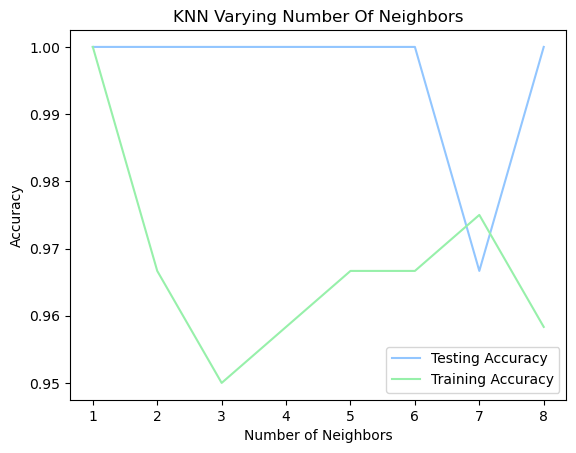

In [36]:
# Generate  the plot
_ = plt.title('KNN Varying Number Of Neighbors')
_ = plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
_ = plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# XG BOOST CLASIFIER

In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier  
from sklearn.metrics import make_scorer
from pandas import MultiIndex, Int16Dtype

param_test = {
    'n_estimators': [10,50,100],
    'max_depth': [3,5,7],
    'min_child_Weight': [1,3],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample': [0.5,0.75,1],
    'colsample_bytree':[0.5,0.75,1],
    'learning_rate': [0.01, 0.05, 0.1]
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

grid_search_xgb = GridSearchCV(estimator = XGBClassifier(eval_matric='mlogloss',use_label_encoder=False),
param_grid = param_test,
scoring=scoring,
cv=5,
verbose = 1,
refit='Accuracy' ,
n_jobs  =-1)

grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_matric='mlogloss', eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=N...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_Weight': [1, 3],
                         'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.75, 1]},
             refit='Accuracy',
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)},
             verbose=1)

In [48]:
# Import necessary libraries
from sklearn import ensemble, linear_model, neighbors, svm, tree, model_selection
from xgboost import XGBClassifier  

# Define models
svc_model = svm.SVC()
clf = ensemble.RandomForestClassifier()
XGB = XGBClassifier()  
knn = neighbors.KNeighborsClassifier()

# Create the model list
Model = [
    svc_model,  # Support Vector Classifier
    clf,        # RandomForest Classifier
    XGB,        # XGBoost Classifier 
    knn         # k-Nearest Neighbors
]



In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from scipy.special import softmax  # For normalizing decision_function output

# Initialize DataFrame
Model_columns = ['Model Name', 'Model Test Accuracy', 'Model Precision', 'Model Recall', 'Model AUC']
Model_compare = pd.DataFrame(columns=Model_columns)

row_index = 0

for alg in Model:  
    # Train model and make predictions
    alg.fit(x_train, y_train)
    predicted = alg.predict(x_test)

    # Calculate Metrics
    accuracy = round(alg.score(x_test, y_test), 4)
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')

    # Compute AUC Score
    if hasattr(alg, "predict_proba"):
        prob_scores = alg.predict_proba(x_test)
        auc_score = roc_auc_score(y_test, prob_scores, multi_class='ovr', average='macro')
    elif hasattr(alg, "decision_function"):
        decision_scores = alg.decision_function(x_test)
        prob_scores = softmax(decision_scores, axis=1)  # Normalize scores to sum to 1
        auc_score = roc_auc_score(y_test, prob_scores, multi_class='ovr', average='macro')
    else:
        auc_score = np.nan  # If neither method exists, assign NaN

    # Store results in DataFrame
    Model_compare.loc[row_index] = [type(alg).__name__, accuracy, precision, recall, auc_score]
    row_index += 1

# Sort results by Model Test Accuracy
Model_compare.sort_values(by=['Model Test Accuracy'], ascending=False, inplace=True)

# Display the results
print(Model_compare)


               Model Name  Model Test Accuracy  Model Precision  Model Recall  \
0                     SVC                  1.0              1.0           1.0   
1  RandomForestClassifier                  1.0              1.0           1.0   
2           XGBClassifier                  1.0              1.0           1.0   
3    KNeighborsClassifier                  1.0              1.0           1.0   

   Model AUC  
0        1.0  
1        1.0  
2        1.0  
3        1.0  


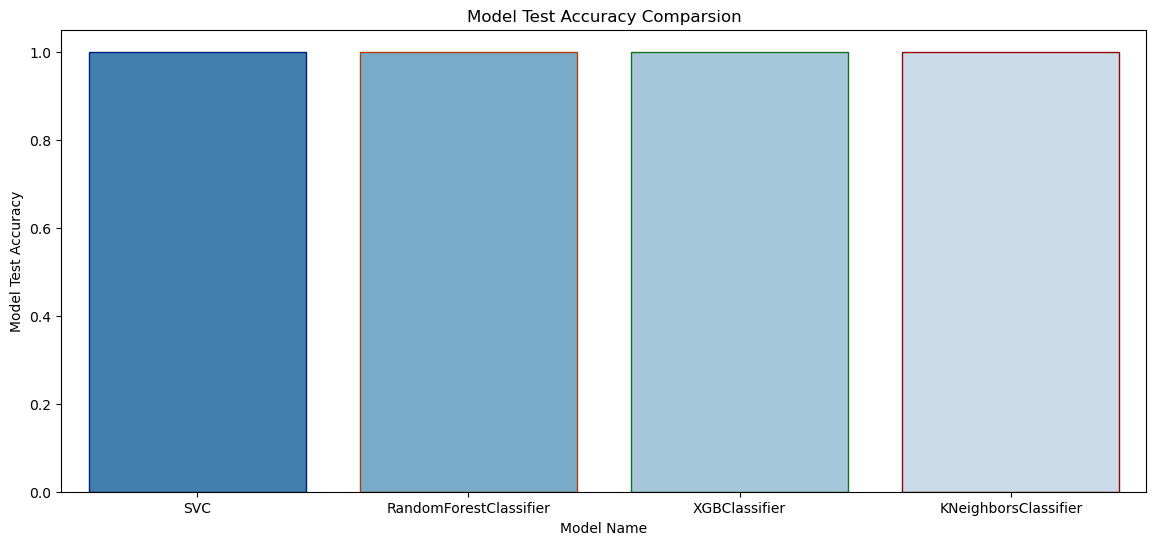

In [51]:
# Model Test Accuracy Comparison

plt.subplots(figsize=(14,6))
sns.barplot(x="Model Name", y="Model Test Accuracy",data=Model_compare,palette='tab20c',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Model Test Accuracy Comparsion')
plt.show()